# Assignment 4 - TinyML HelloWorld - Section 1
Based on the **hello_world** example from [TensorFlow Lite for MicroControllers](https://github.com/tensorflow/tflite-micro/tree/main/tensorflow/lite/micro/examples/hello_world).

© SkillSurf 2024

## Introduction

In this section you will train a Tensorflow model to a set of sinusoidal data. First you will synthesize the data to mimic a sine wave. Then you can build your own tensorflow model and fit the model to the generated data. Start by importing the relevant modules.

## Import modules

In [1]:
# Import Tensorflow and NumPy
# Set random seed to get reproducible results
import numpy as np
np.random.seed(1)

import tensorflow as tf
tf.random.set_seed(1)

In [2]:
import os
from tensorflow import keras
import matplotlib.pyplot as plt
import math

##  Create the Dataset

You can use NumPy to generate a sinewave data and add some gaussian noise to make the data more realistic. The dataset will consist of 1000 datapoints (x-values) and relevant y-values. The following code creates a sine wave dataset.

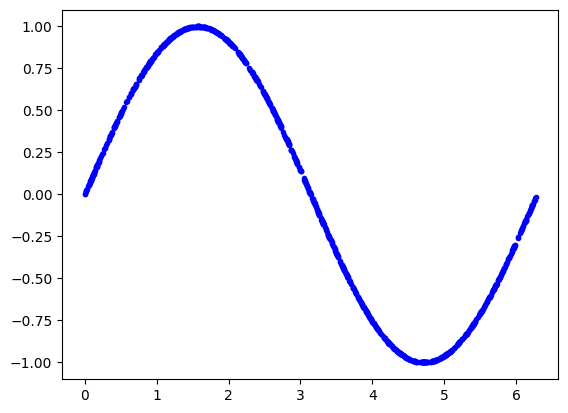

In [3]:
# Number of sample datapoints
SAMPLES = 1000

# Generate a uniformly distributed set of random numbers in the range from
# 0 to 2π, which covers a complete sine wave oscillation
x_values = np.random.uniform(
    low=0, high=2*math.pi, size=SAMPLES).astype(np.float32)

# Shuffle the values to guarantee they're not in order
np.random.shuffle(x_values)

# Calculate the corresponding sine values
y_values = np.sin(x_values).astype(np.float32)

# Plot the data. The 'b.' argument tells the library to print blue dots.
plt.plot(x_values, y_values, 'b.')
plt.show()

Next add noise to the data to make the data more realistic. (In real-life the data we obtain usually get contaminated by different kinds of noise.)

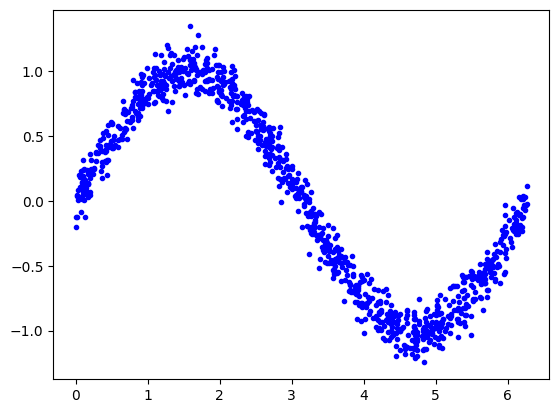

In [4]:
# Add a small random number to each y value
y_values += 0.1 * np.random.randn(*y_values.shape)

# Plot our data
plt.plot(x_values, y_values, 'b.')
plt.show()

## Pre-process data (Graded)

The dataset has been given, now you will have to split this dataset into train, validation and test subsets. The following table shows the split ratio you should be using.

| Split | Percentage |
|----------|----------|
| Train | 60% |
| Validation | 20% |
| Test | 20% |

You may use the `np.split()` function for obtaining 3 splits of data from one line of code. You have to provide the indiced of points which the dataset is divided. The second argument to `np.split()` is an array of indices where the data will be split. We provide two indices, so the data will be divided into three chunks. For more clarification look into the documentation of [np.split()](https://numpy.org/doc/stable/reference/generated/numpy.split.html).


### Exercise 1
Complete the code below to split the data accordingly and plot all three splits in the same plot.

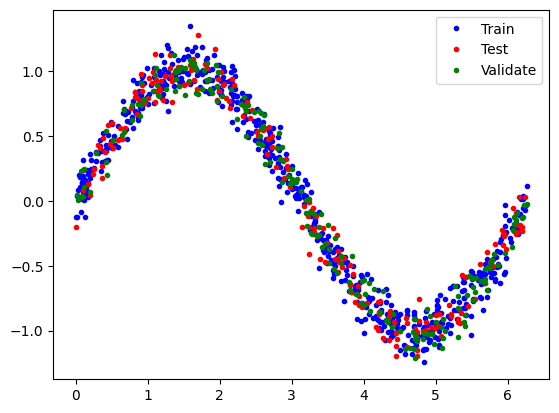

In [5]:
# Define the indices where the dataset will get chopped (TODO)
TRAIN_SPLIT = int(0.6 * SAMPLES)
TEST_SPLIT = int(0.8 * SAMPLES)

# Use np.split to chop the data into three parts (TODO)
x_train, x_validate, x_test = np.split(x_values, [TRAIN_SPLIT, TEST_SPLIT])
y_train, y_validate, y_test = np.split(y_values, [TRAIN_SPLIT, TEST_SPLIT])

# Double check that our splits add up correctly
assert (x_train.size + x_validate.size + x_test.size) ==  SAMPLES

# Plot the data in each partition in different colors
plt.plot(x_train, y_train, 'b.', label="Train")
plt.plot(x_test, y_test, 'r.', label="Test")
plt.plot(x_validate, y_validate, 'g.', label="Validate")
plt.legend()
plt.show()


## Build the Model (Graded)

You have successfully pre-processed the dataset. Next you will have to define build the Tensorflow model using Keras. You may use the Tensorflow Keras Sequential API. Please refer to the official [Keras documentation](https://www.tensorflow.org/api_docs/python/tf/keras/layers) for further information. Use the below architecture to design your the model.

- Input layer
- 2 Dense layers each consisting of 16 hidden units and ReLU activation - [keras.layers.Dense()](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dense)
- Output layer with 1 unit

### Exercise 2
Design the sequential model according to the specifications above.




In [6]:
# Define the model using the Keras Sequential API
model = keras.Sequential([
    # Input layer is implicitly defined by the shape of the first layer
    keras.layers.Dense(16, activation='relu', input_shape=(1,)),  # First Dense layer with 16 units and ReLU
    keras.layers.Dense(16, activation='relu'),                    # Second Dense layer with 16 units and ReLU
    keras.layers.Dense(1)                                         # Output layer with 1 unit
])

# Display the model architecture
model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 16)                  │              32 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 16)                  │             272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 321 (1.25 KB)

 Trainable params: 321 (1.25 KB)

 Non-trainable params: 0 (0.00 B)

Now that you have created the model, specify the optimizer, loss function and acuracy metrics. Use the below,

- Optimizer: Adam
- Loss function: Mean Squared Error (MSE)
- Metric: Mean Absolute Error (MAE)

You may use `model.compile()` and read the [tf.keras.Sequential](https://www.tensorflow.org/api_docs/python/tf/keras/Sequential) documentation for this.

### Exercise 3
Set the optimizer and loss function details as specified as above.

In [7]:
# Compile the model using a standard optimizer and loss function for regression
model.compile(
    optimizer='adam',               # Optimizer: Adam
    loss='mean_squared_error',       # Loss function: Mean Squared Error (MSE)
    metrics=['mean_absolute_error']  # Metric: Mean Absolute Error (MAE)
)


In [8]:
# Get model summary
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 16)                  │              32 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 16)                  │             272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 321 (1.25 KB)

 Trainable params: 321 (1.25 KB)

 Non-trainable params: 0 (0.00 B)

## Train the Model (Graded)

Fit the model to the data using `model.fit()`. Train for 500 epochs with a batch size of 64. Use only the train and validation sets during training.

### Exercise 4
Fit the model to the data. Keep track of the losses and metrics using `history` object.

In [9]:
# Fit the model to the data and keep track of losses
history = model.fit(
    x_train,            # Training input data
    y_train,            # Training output data
    epochs=500,         # Number of epochs
    batch_size=64,      # Batch size
    validation_data=(x_validate, y_validate),  # Validation data
    verbose=1           # Verbose mode to display progress during training
)


Epoch 1/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.4288 - mean_absolute_error: 0.5586 - val_loss: 0.3986 - val_mean_absolute_error: 0.5323
Epoch 2/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.4052 - mean_absolute_error: 0.5418 - val_loss: 0.3806 - val_mean_absolute_error: 0.5302
Epoch 3/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.3847 - mean_absolute_error: 0.5339 - val_loss: 0.3591 - val_mean_absolute_error: 0.5122
Epoch 4/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.3633 - mean_absolute_error: 0.5142 - val_loss: 0.3387 - val_mean_absolute_error: 0.4971
Epoch 5/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.3412 - mean_absolute_error: 0.4980 - val_loss: 0.3089 - val_mean_absolute_error: 0.4786
Epoch 6/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.3120 - mean_absolute_error: 0.4794 - val_loss: 0.2872 - val_mean_absolute_error: 0.4631
Epoch 7/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2899 - mean_absolute_error: 0.4609 - val_los

## Plotting Loss Curves

The following code plots the loss curves (Training loss and validation loss) with each epoch. The loss curve can be used to check whether your model converged correctly.

<img src="https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/04-loss-curves-overfitting-underfitting-ideal.jpg" alt="Loss Curves" width="600"/>

Run the below cell and make sure your loss curves appear to be as the ones on the right of the below image. For more reading, refer to [this](https://www.learnpytorch.io/04_pytorch_custom_datasets/#8-what-should-an-ideal-loss-curve-look-like).

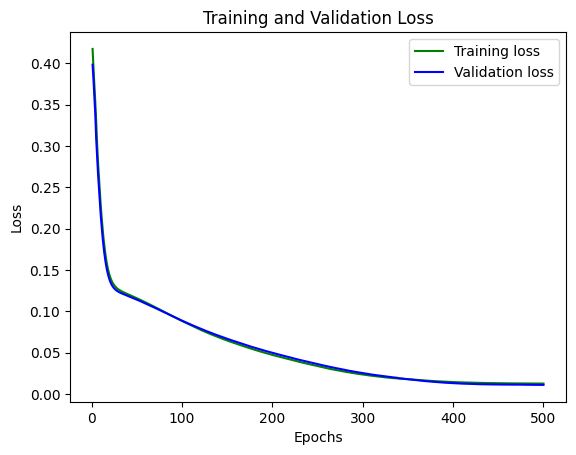

Available metrics in history: dict_keys(['loss', 'mean_absolute_error', 'val_loss', 'val_mean_absolute_error'])


<Figure size 640x480 with 0 Axes>

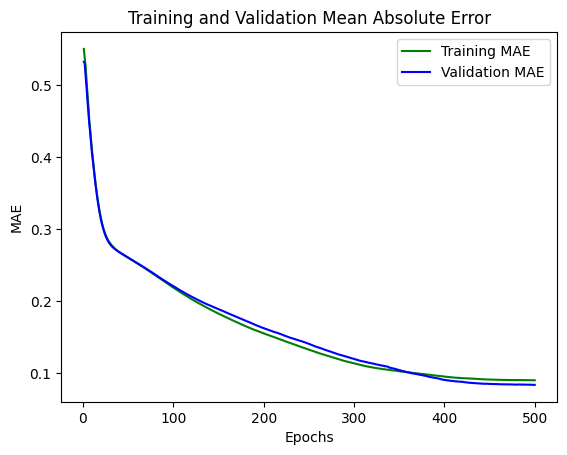

In [12]:
import matplotlib.pyplot as plt

# Ensure the SKIP value is appropriate for the number of epochs
SKIP = 0  # Adjust this value based on your needs; set to 0 to include all epochs

# Plot training and validation loss
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)

plt.figure()
plt.plot(epochs[SKIP:], loss[SKIP:], 'g-', label='Training loss')  # Changed '.' to '-'
plt.plot(epochs[SKIP:], val_loss[SKIP:], 'b-', label='Validation loss')  # Changed '.' to '-'
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.clf()

# Print available keys to identify correct MAE metric names
print("Available metrics in history:", history.history.keys())

# Check and use the correct keys for MAE metrics
mae_key = 'mean_absolute_error'  # Replace with the correct key if different
val_mae_key = 'val_mean_absolute_error'  # Replace with the correct key if different

mae = history.history.get(mae_key)
val_mae = history.history.get(val_mae_key)

if mae is not None and val_mae is not None:
    plt.figure()
    plt.plot(epochs[SKIP:], mae[SKIP:], 'g-', label='Training MAE')  # Changed '.' to '-'
    plt.plot(epochs[SKIP:], val_mae[SKIP:], 'b-', label='Validation MAE')  # Changed '.' to '-'
    plt.title('Training and Validation Mean Absolute Error')
    plt.xlabel('Epochs')
    plt.ylabel('MAE')
    plt.legend()
    plt.show()
else:
    print("Mean Absolute Error metrics are not available in the history.")


## Predict using model (Graded)

Use `model.predict()` to predict values for all data in test set and plot it against true values. You may refer to this [documentation](https://www.tensorflow.org/guide/keras/training_with_built_in_methods) for more information.

### Exercise 5
Predict y values for test data and plot it with true values.

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


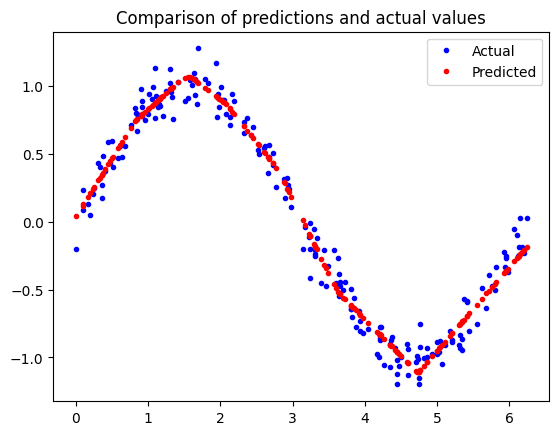

In [13]:
# Make predictions based on our test dataset (TODO)
predictions = model.predict(x_test)

# Graph the predictions against the actual values
plt.clf()
plt.title('Comparison of predictions and actual values')
plt.plot(x_test, y_test, 'b.', label='Actual')
plt.plot(x_test, predictions, 'r.', label='Predicted')
plt.legend()
plt.show()

### Exercise 6
The predicted graph is not nearly as smooth enough to be a sine. Rather it may look like a piecewise combination of linear functions. Briefly explain how you can make this more smoother and identical to an actual sine wave.

## Get weights

Now you will extract the weight matrices from the model. This step is in order to convert these weight matrices to C++ files that will be embedded in the Microcontroller.

In [14]:
# Extract weights and biases as Numpy arrays
W1, b1 = model.layers[0].get_weights()
W2, b2 = model.layers[1].get_weights()
W3, b3 = model.layers[2].get_weights()

In [15]:
print(W1.shape, b1.shape)
print(W2.shape, b2.shape)
print(W3.shape, b3.shape)

(1, 16) (16,)
(16, 16) (16,)
(16, 1) (1,)


The following code performs the forward propagation of the model manually using NumPy matrix multiplication. Run the following code to make sure the model's prediction and manual prediction is same.

In [16]:
xs = x_test

In [17]:
# This is what the TF model does internally:
ys = []
for x in xs:
    x = np.array([x])       # x should be array
    h1 = x @ W1 + b1        # dense layer
    h1 = np.maximum(0, h1)  # ReLU
    h2 = h1 @ W2 + b2       # dense layer
    h2 = np.maximum(0, h2)  # ReLU
    h3 = h2 @ W3 + b3       # dense layer
    ys.append(h3)

ys = np.stack(ys)

In [18]:
# Are our predictions the same as TF's predictions?
# This should print 0 if the results are close enough.
print(np.sum(np.abs(ys - predictions) > 1e-6))  # Should print 0 if they are close enough


0


## Export the weights for C++

The following code compresses the weights and biases into a C++ format which will be stored in the Microcontroller's FLASH memory. Copy the generated output and paste in file named `model_data.cpp`.

In [19]:
# Note that we transpose W2. This makes the inner loop for the
# matrix multiplication a little simpler.

names = ["W1_data", "b1_data", "W2_data", "b2_data", "W3_data", "b3_data"]
arrays = [W1, b1, W2.T, b2, W3, b3]

In [20]:
# Copy this into model_data.cpp:

for name, array in zip(names, arrays):
    print("const float %s[] PROGMEM = {" % name)
    print("   ", ", ".join([str(x) + "f" for x in array.flatten()]))
    print("};\n")

const float W1_data[] PROGMEM = {
    -0.20968106f, -0.40894282f, 0.5666974f, 0.022080446f, -0.21071774f, 0.2559584f, -0.33475357f, -0.4573499f, 0.138243f, -0.54041797f, 0.20992972f, -0.36495143f, -0.05582869f, 0.65957916f, 0.478987f, -0.46314204f
};

const float b1_data[] PROGMEM = {
    0.0f, 0.0f, 0.273521f, 0.1544416f, 0.0f, 0.5817219f, 0.0f, 0.0f, -0.28991345f, 0.0f, -0.58686364f, 0.0f, 0.0f, -0.9741869f, -0.0052238577f, 0.0f
};

const float W2_data[] PROGMEM = {
    -0.18758528f, -0.22891311f, -0.22634149f, 0.4542626f, -0.15429527f, -0.15280572f, 0.25078556f, -0.30672795f, 0.20584628f, -0.055847555f, 0.020724684f, 0.09618804f, -0.25379714f, -0.38036627f, 0.032453615f, -0.20054199f, -0.35586986f, -0.2903623f, 0.188046f, -0.09561993f, -0.33890307f, 0.3740042f, 0.41879204f, -0.0085635185f, -0.5470803f, -0.4132978f, -0.70695686f, 0.40479222f, -0.3315459f, -0.0772111f, -0.058975525f, 0.07553324f, 0.37238708f, 0.25920042f, 0.39414722f, 0.038809408f, -0.23379762f, -0.2428089f, -0.122193

## End of Section 1